In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=1, epochs=1):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand(1)

        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self._activation(weighted_sum)

    def _activation(self, z):
        return 1 if z >= 0 else 0

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = load_iris()

X = iris.data[:,:2]
y = np.where(iris.target!=0, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

perceptron = Perceptron(learning_rate=1, epochs=1)

perceptron.fit(X_train, y_train)

y_pred = np.array([perceptron.predict(x) for x in X_test])

report = classification_report(
  y_test, y_pred,
  target_names=[
    'Iris-setosa',
    'Iris-other'
  ]
)

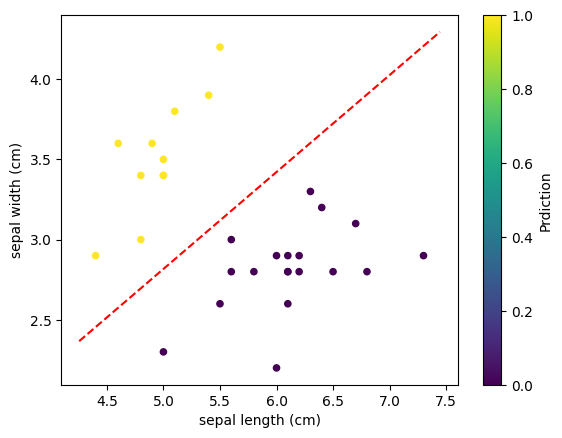

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(X_test, columns=iris.feature_names[:2])
df['Prdiction'] = y_pred

df.plot.scatter(
    x='sepal length (cm)',
    y='sepal width (cm)',
    c='Prdiction',
    colormap='viridis'
)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())

y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias[0]) / perceptron.weights[1]

plt.plot(x_vals, y_vals, '--', c='red')

plt.show()